In [1]:
# 1. Load Bristol Crime Data, Handle Missing Values, and Encode Categoricals
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_excel('Data/bristol_crime_ml_ready.xlsx')

# Handle missing values: drop rows with all NaNs, fill others as needed
df = df.dropna(how='all')
# For demonstration, fill missing values in categorical columns with 'Unknown', numerics with median
cat_cols = ['category', 'location_type', 'street_name']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
for col in df.select_dtypes(include=['float', 'int']).columns:
    df[col] = df[col].fillna(df[col].median())

# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col + '_code'] = le.fit_transform(df[col])
        label_encoders[col] = le

# If you prefer one-hot encoding, uncomment the following:
# df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols)

print('Data shape after cleaning:', df.shape)
df.head()

Data shape after cleaning: (174597, 17)


/Users/ayaz/Documents/University_Work/teamWork/TEAM4/.venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month,lat,lng,street_name,year,month_num,category_code,location_type_code,street_name_code
0,anti-social-behaviour,Force,"{'latitude': '51.447531', 'street': {'id': 227...",NaN,NaN,NaN,106880411,NaN,2022-12,51.447531,-2.590662,On or near Redcliff Hill,2022,12,0,1,469
1,anti-social-behaviour,Force,"{'latitude': '51.456844', 'street': {'id': 227...",NaN,NaN,NaN,106879221,NaN,2022-12,51.456844,-2.594626,On or near Rupert Street,2022,12,0,1,485
2,anti-social-behaviour,Force,"{'latitude': '51.453030', 'street': {'id': 227...",NaN,NaN,NaN,106879167,NaN,2022-12,51.453030,-2.593194,On or near,2022,12,0,1,3
3,anti-social-behaviour,Force,"{'latitude': '51.456677', 'street': {'id': 227...",NaN,NaN,NaN,106880442,NaN,2022-12,51.456677,-2.592162,On or near,2022,12,0,1,3
4,anti-social-behaviour,Force,"{'latitude': '51.458279', 'street': {'id': 227...",NaN,NaN,NaN,106880357,NaN,2022-12,51.458279,-2.584727,On or near,2022,12,0,1,3


In [ ]:
# 1a. Save cleaned crime and weather data for dashboard visualization
df.to_excel('Data/bristol_crime_cleaned.xlsx', index=False)
weather_df.to_excel('Data/bristol_weather_cleaned.xlsx', index=False)
print('Cleaned crime and weather data saved for dashboard use.')

In [2]:
# 2. Load Bristol Weather Data and Merge with Crime Data
# Load weather data
weather_df = pd.read_excel('Data/bristol_weather_2010_2025.xlsx')

# Convert date column to datetime
if 'date' in weather_df.columns:
    weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce')
    weather_df['year'] = weather_df['date'].dt.year
    weather_df['month'] = weather_df['date'].dt.month
else:
    raise ValueError('No "date" column found in weather data.')

# Prepare for merge: ensure crime data has year/month columns
if 'year' not in df.columns or 'month' not in df.columns:
    raise ValueError('Crime data must have "year" and "month" columns for merging.')

# Fix month column if it contains strings like 'YYYY-MM'
if df['month'].dtype == 'object':
    df['month'] = df['month'].astype(str).str.extract(r'(\d{1,2})$')[0].astype(int)

# Ensure 'year' and 'month' columns are integers in both DataFrames
df['year'] = df['year'].astype(int)
weather_df['year'] = weather_df['year'].astype(int)
weather_df['month'] = weather_df['month'].astype(int)

# Merge on year and month (many-to-one join)
df_merged = pd.merge(df, weather_df, on=['year', 'month'], how='left', suffixes=('', '_weather'))

print('Merged data shape:', df_merged.shape)
df_merged.head()

Merged data shape: (5319501, 23)


,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month,lat,...,month_num,category_code,location_type_code,street_name_code,date,temperature_max,temperature_min,precipitation_sum,windspeed_max,weather_code
0,anti-social-behaviour,Force,"{'latitude': '51.447531', 'street': {'id': 227...",NaN,NaN,NaN,106880411,NaN,12,51.447531,...,12,0,1,469,2022-12-01,5.2,1.4,0.0,10.3,3
1,anti-social-behaviour,Force,"{'latitude': '51.447531', 'street': {'id': 227...",NaN,NaN,NaN,106880411,NaN,12,51.447531,...,12,0,1,469,2022-12-02,5.7,2.5,0.0,16.1,3
2,anti-social-behaviour,Force,"{'latitude': '51.447531', 'street': {'id': 227...",NaN,NaN,NaN,106880411,NaN,12,51.447531,...,12,0,1,469,2022-12-03,6.2,4.1,0.1,22.7,51
3,anti-social-behaviour,Force,"{'latitude': '51.447531', 'street': {'id': 227...",NaN,NaN,NaN,106880411,NaN,12,51.447531,...,12,0,1,469,2022-12-04,5.0,2.2,0.4,18.7,51
4,anti-social-behaviour,Force,"{'latitude': '51.447531', 'street': {'id': 227...",NaN,NaN,NaN,106880411,NaN,12,51.447531,...,12,0,1,469,2022-12-05,7.4,3.4,0.1,19.2,51


In [3]:
# 3. Create Feature DataFrame and Add UK Season Column
# Select relevant features
feature_cols = [
    'month', 'year', 'category', 'lat', 'lng',
    'temperature_max', 'precipitation_sum', 'windspeed_max'
]
# Adjust column names if needed (e.g., 'latitude'/'longitude' instead of 'lat'/'lng')
for alt_lat in ['lat', 'latitude']:
    if alt_lat in df_merged.columns:
        lat_col = alt_lat
        break
for alt_lng in ['lng', 'longitude']:
    if alt_lng in df_merged.columns:
        lng_col = alt_lng
        break
else:
    lat_col = 'lat'
    lng_col = 'lng'

# Build the feature DataFrame
df_features = df_merged[[
    'month', 'year', 'category', lat_col, lng_col,
    'temperature_max', 'precipitation_sum', 'windspeed_max'
]].copy()
df_features.rename(columns={lat_col: 'lat', lng_col: 'lng'}, inplace=True)

# Add UK season column
def get_uk_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'
df_features['season'] = df_features['month'].apply(get_uk_season)

print('Feature DataFrame shape:', df_features.shape)
df_features.head()

Feature DataFrame shape: (5319501, 9)


,month,year,category,lat,lng,temperature_max,precipitation_sum,windspeed_max,season
0,12,2022,anti-social-behaviour,51.447531,-2.590662,5.2,0.0,10.3,Winter
1,12,2022,anti-social-behaviour,51.447531,-2.590662,5.7,0.0,16.1,Winter
2,12,2022,anti-social-behaviour,51.447531,-2.590662,6.2,0.1,22.7,Winter
3,12,2022,anti-social-behaviour,51.447531,-2.590662,5.0,0.4,18.7,Winter
4,12,2022,anti-social-behaviour,51.447531,-2.590662,7.4,0.1,19.2,Winter


In [4]:
# 4. Train RandomForestClassifier to Predict Crime Category
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Ensure category_code exists (from label encoding in cell 1)
if 'category_code' not in df.columns:
    raise ValueError('category_code column not found. Please ensure label encoding was performed.')

# Select features for modeling
model_features = [
    'month', 'year', 'lat', 'lng',
    'temperature_max', 'precipitation_sum', 'windspeed_max'
]
X = df_features[model_features]

# Ensure target matches features after merge
if 'category_code' in df_features.columns:
    y = df_features['category_code']
else:
    # fallback: align by index
    y = df_features.index.map(df['category_code'])

# Drop rows where y is NaN to avoid ValueError
mask = ~y.isna()
X = X[mask]
y = y[mask]

# Optional: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.22      0.22      0.22      5561
         1.0       0.13      0.06      0.09      1270
         2.0       0.12      0.07      0.09      1152
         3.0       0.15      0.09      0.11      2297
         4.0       0.06      0.03      0.04       694
         5.0       0.01      0.00      0.01       280
         6.0       0.16      0.13      0.15      2978
         7.0       0.04      0.01      0.02       266
         8.0       0.17      0.15      0.16      4005
         9.0       0.07      0.04      0.05       803
        10.0       0.19      0.12      0.15      2801
        11.0       0.09      0.04      0.06       536
        12.0       0.15      0.10      0.12      2149
        13.0       0.32      0.52      0.40     10128

    accuracy                           0.24     34920
   macro avg       0.13      0.11      0.12     34920
weighted avg       0.21      0.24      0.22

/Users/ayaz/Documents/University_Work/teamWork/TEAM4/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:26:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.36      0.39      5561
         1.0       0.47      0.20      0.28      1270
         2.0       0.49      0.17      0.26      1152
         3.0       0.46      0.23      0.31      2297
         4.0       0.39      0.11      0.17       694
         5.0       0.24      0.04      0.06       280
         6.0       0.43      0.25      0.32      2978
         7.0       0.15      0.03      0.04       266
         8.0       0.50      0.25      0.33      4005
         9.0       0.47      0.15      0.23       803
        10.0       0.53      0.21      0.31      2801
        11.0       0.41      0.12      0.19       536
        12.0       0.50      0.22      0.30      2149
        13.0       0.39      0.85      0.54     10128

    accuracy                           0.42     34920
   macro avg       0.42      0.23      0.27     34920
weighted avg       0.44      0.42      0.38     3

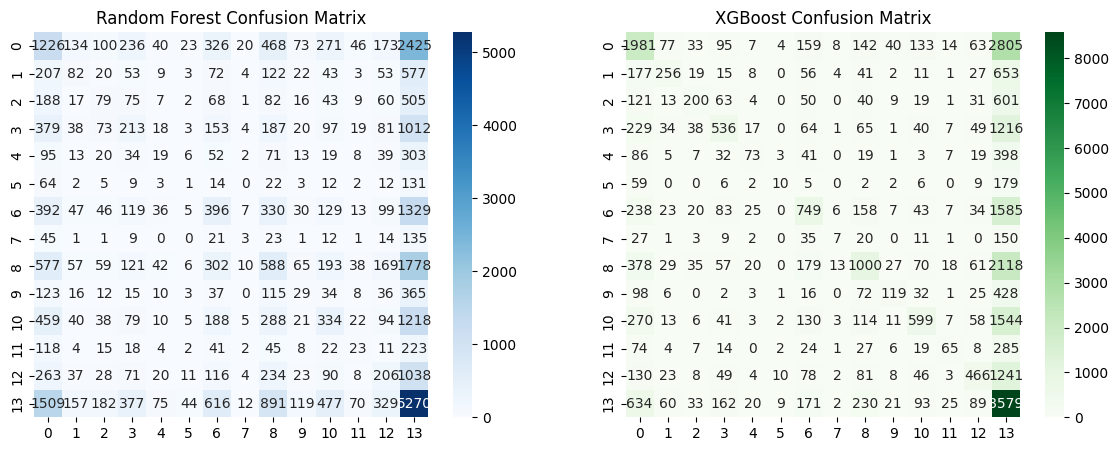

In [5]:
# 5. Train XGBClassifier and Compare with Random Forest
try:
    from xgboost import XGBClassifier
except ImportError:
    import sys
    !{sys.executable} -m pip install xgboost
    from xgboost import XGBClassifier

# Use the same train-test split as before (X_train, X_test, y_train, y_test)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb))
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))

# Optional: Compare side by side
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('XGBoost Confusion Matrix')
plt.show()

Random Forest Metrics:
Accuracy: 0.2425257731958763
Precision (macro): 0.13357956208015262
Recall (macro): 0.1130587159847191
F1-score (macro): 0.11686406774123079

Classification Report:
              precision    recall  f1-score   support

         0.0       0.22      0.22      0.22      5561
         1.0       0.13      0.06      0.09      1270
         2.0       0.12      0.07      0.09      1152
         3.0       0.15      0.09      0.11      2297
         4.0       0.06      0.03      0.04       694
         5.0       0.01      0.00      0.01       280
         6.0       0.16      0.13      0.15      2978
         7.0       0.04      0.01      0.02       266
         8.0       0.17      0.15      0.16      4005
         9.0       0.07      0.04      0.05       803
        10.0       0.19      0.12      0.15      2801
        11.0       0.09      0.04      0.06       536
        12.0       0.15      0.10      0.12      2149
        13.0       0.32      0.52      0.40     10128



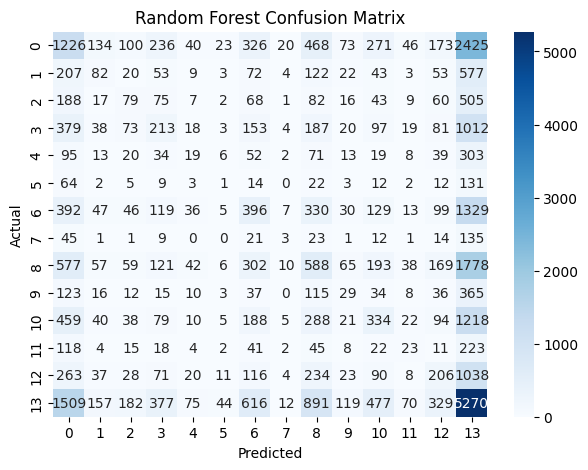

XGBoost Metrics:
Accuracy: 0.41924398625429554
Precision (macro): 0.4192772109633426
Recall (macro): 0.22717134638924522
F1-score (macro): 0.26576763498567896

Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.36      0.39      5561
         1.0       0.47      0.20      0.28      1270
         2.0       0.49      0.17      0.26      1152
         3.0       0.46      0.23      0.31      2297
         4.0       0.39      0.11      0.17       694
         5.0       0.24      0.04      0.06       280
         6.0       0.43      0.25      0.32      2978
         7.0       0.15      0.03      0.04       266
         8.0       0.50      0.25      0.33      4005
         9.0       0.47      0.15      0.23       803
        10.0       0.53      0.21      0.31      2801
        11.0       0.41      0.12      0.19       536
        12.0       0.50      0.22      0.30      2149
        13.0       0.39      0.85      0.54     10128

    a

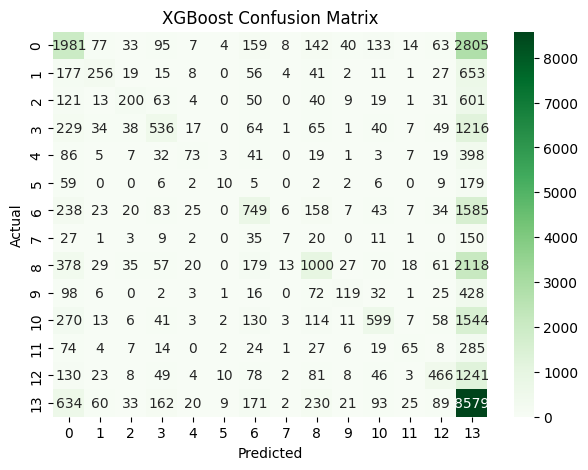

In [6]:
# 6. Evaluate Both Models: Accuracy, Precision, Recall, F1-score, Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest metrics
print('Random Forest Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1-score (macro):', f1_score(y_test, y_pred, average='macro'))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost metrics
print('XGBoost Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Precision (macro):', precision_score(y_test, y_pred_xgb, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred_xgb, average='macro'))
print('F1-score (macro):', f1_score(y_test, y_pred_xgb, average='macro'))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(7,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

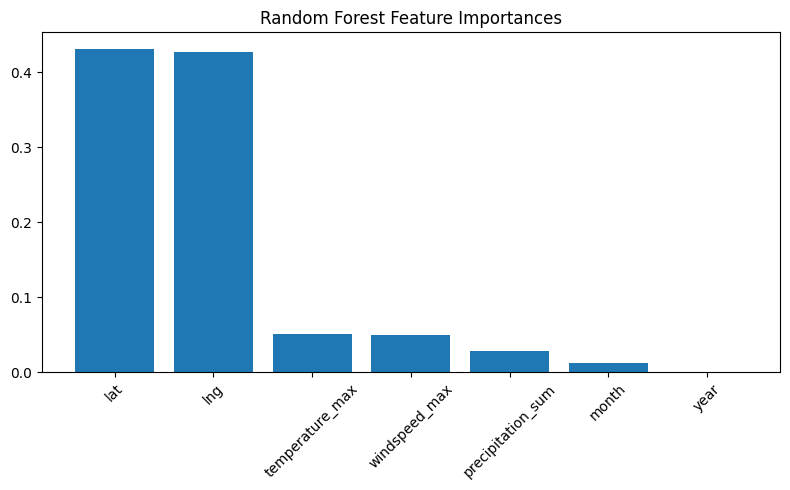

<Figure size 800x500 with 0 Axes>

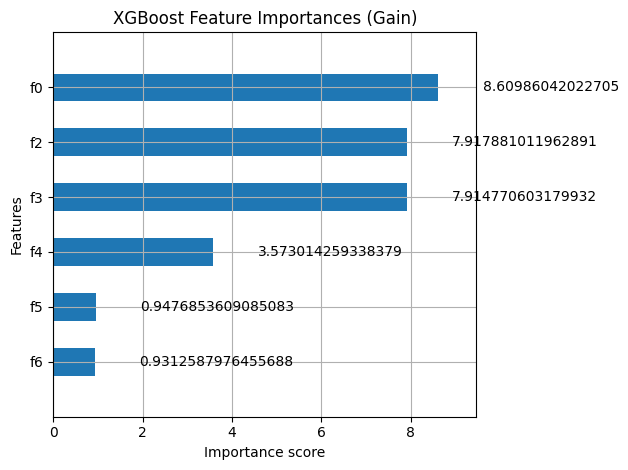

In [7]:
# 7. Visualize Feature Importances for Both Models
import matplotlib.pyplot as plt
import numpy as np
from xgboost import plot_importance

# Feature names
feature_names = model_features

# Random Forest feature importances
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(8,5))
plt.title('Random Forest Feature Importances')
plt.bar(range(len(importances_rf)), importances_rf[indices_rf], align='center')
plt.xticks(range(len(importances_rf)), [feature_names[i] for i in indices_rf], rotation=45)
plt.tight_layout()
plt.show()

# XGBoost feature importances (using built-in plot)
plt.figure(figsize=(8,5))
plot_importance(xgb, importance_type='gain', max_num_features=len(feature_names), height=0.5)
plt.title('XGBoost Feature Importances (Gain)')
plt.tight_layout()
plt.show()

In [8]:
# 8. Save the Best-Performing Model for Later Use
import joblib

# Choose the best model based on accuracy (or other metric)
rf_acc = accuracy_score(y_test, y_pred)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

if xgb_acc > rf_acc:
    best_model = xgb
    model_name = 'xgboost_crime_model.joblib'
    print('Saving XGBoost model...')
else:
    best_model = rf
    model_name = 'randomforest_crime_model.joblib'
    print('Saving Random Forest model...')

joblib.dump(best_model, model_name)
print(f'Model saved as {model_name}')

Saving XGBoost model...
Model saved as xgboost_crime_model.joblib
